# Scaling data 

## Objectives

- Understanding the effect of different scalers on the data.

- Using different scaler in sklearn.

In [1]:
import statsmodels.api as sm
import pandas as pd

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('../day-8-multiple-regression/data/Advertising.csv', index_col= 0)

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
model = sm.OLS(df.Sales, sm.add_constant(df.drop(columns = 'Sales')))
                

In [7]:
result = model.fit()

In [8]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           1.58e-96
Time:                        10:10:29   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
np.random.seed(seed=42)
X = np.random.multivariate_normal(mean=(1, 1),
                                  cov=[[1, 0.7], [0.7, 1]],
                                  size=200)

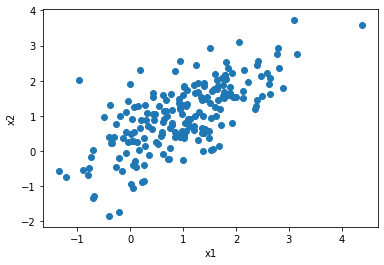

In [10]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Initial Distribitions of the Columns


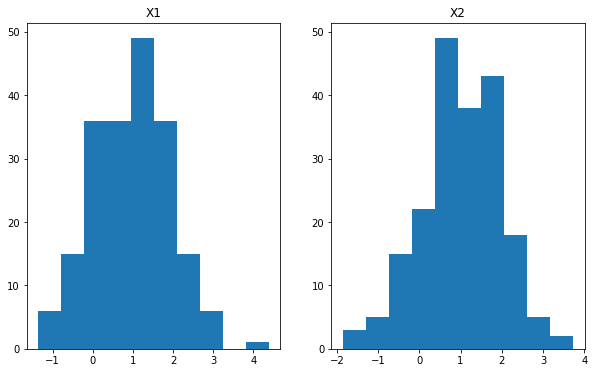

In [11]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('X1')
plt.hist(X[:, 0])

plt.subplot(1, 2, 2)
plt.title('X2')
plt.hist(X[:, 1])

plt.show()

## Scalers in Sklearn and their effect on the data

## Centralize

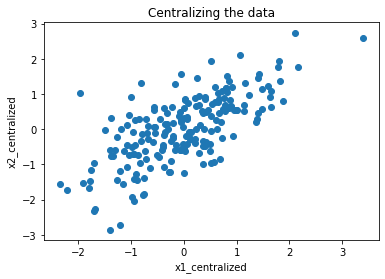

In [12]:
X_centralized = X - X.mean()

plt.scatter(X_centralized[:,0], X_centralized[:,1])

plt.title('Centralizing the data')

plt.xlabel('x1_centralized')
plt.ylabel('x2_centralized')

plt.show()

In [15]:
(X_centralized / X_centralized.std()).std()

1.0

## StandardScaler

[Sklearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [16]:
from sklearn.preprocessing import StandardScaler

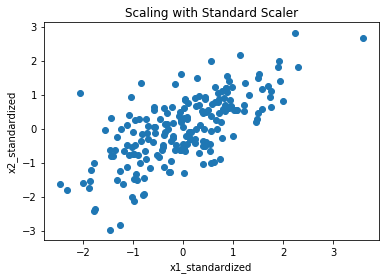

In [17]:
standard_scaler = StandardScaler()

X_std_scaled = standard_scaler.fit_transform(X)

plt.scatter(X_std_scaled[:, 0], X_std_scaled[:, 1])

plt.title('Scaling with Standard Scaler')

plt.xlabel('x1_standardized')
plt.ylabel('x2_standardized')

plt.show()

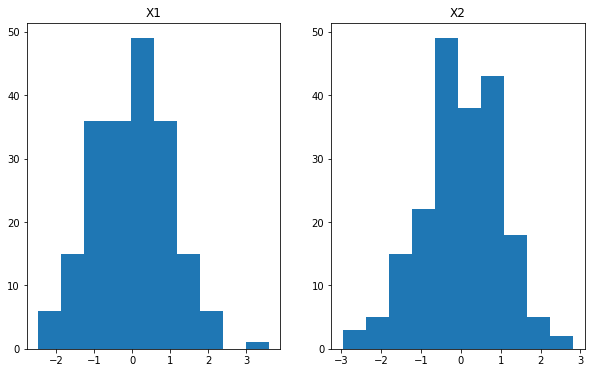

In [18]:
plt.figure(figsize= (10,6))
plt.subplot(1,2,1)
plt.title('X1')
plt.hist(X_std_scaled[:,0])

plt.subplot(1,2,2)
plt.title('X2')
plt.hist(X_std_scaled[:,1])

plt.show()

In [19]:
# let's investigate columns separately

X1_std_scaled_mean = round(X_std_scaled[:, 0].mean(), 4)

X1_std_scaled_std = round(X_std_scaled[:, 0].std(), 4)

print(f'Mean of X1 after standard scaling is {X1_std_scaled_mean:.4f}')
print(f'Std of X1 after standard scaling is {X1_std_scaled_std:.4f}')

Mean of X1 after standard scaling is 0.0000
Std of X1 after standard scaling is 1.0000


In [20]:
# let's investigate columns separately

X2_std_scaled_mean = round(X_std_scaled[:, 1].mean(), 4)

X2_std_scaled_std = round(X_std_scaled[:, 1].std(), 4)

print(f'Mean of X2 after standard scaling is {X2_std_scaled_mean:.4f}')
print(f'Std of X2 after standard scaling is {X2_std_scaled_std:.4f}')

Mean of X2 after standard scaling is 0.0000
Std of X2 after standard scaling is 1.0000


In [59]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [60]:
y = df.Sales
X = df.drop(columns = 'Sales')
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [61]:
X_standardized = (X-X.mean()) / X.std()
X_standardized.mean()

TV           1.265654e-16
Radio       -1.595946e-15
Newspaper    2.498002e-16
dtype: float64

In [62]:
X_standardized.std()

TV           1.0
Radio        1.0
Newspaper    1.0
dtype: float64

In [65]:
model_std = sm.OLS(y, sm.add_constant(X_standardized))
result_std = model_std.fit()
result_std.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           1.58e-96
Time:                        11:30:59   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0225      0.119    117.655      0.000      13.787      14.258
TV             3.9291      0.120     32.809      0.000       3.693       4.165
Radio          2.7991      0.128     21.893      0.000       2.547       3.051
Newspaper     -0.0226      0.128     -0.177      0.860      -0.275       0.230
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         1.46
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### this time iwth sklearn

In [30]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [66]:
X_ss = ss.fit_transform(X)

# same thing as 
# ss.fit(X)
# X_ss = ss.transform(X)

In [35]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [67]:
y[:10]

1     22.1
2     10.4
3      9.3
4     18.5
5     12.9
6      7.2
7     11.8
8     13.2
9      4.8
10    10.6
Name: Sales, dtype: float64

In [37]:
lm.fit(X_ss, y)
print(lm.coef_)
print(lm.intercept_)

[ 3.91925365  2.79206274 -0.02253861]
14.0225


Note that standard scaler is __not__ necessarily makes data __normal__

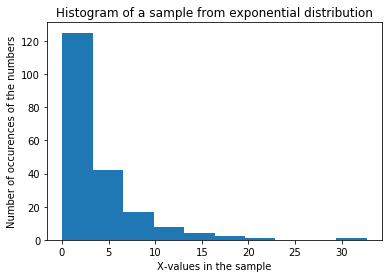

In [38]:
exponential_data = np.random.exponential(scale=4, size=200)

plt.hist(exponential_data)
plt.title('Histogram of a sample from exponential distribution')
plt.xlabel('X-values in the sample')
plt.ylabel('Number of occurences of the numbers')
plt.show()

In [39]:
# let's mean and std seperately

exponential_mean = round(exponential_data.mean(), 4)

exponential_std = round(exponential_data.std(), 4)

print(f'Mean of exponential_data is {exponential_mean:.4f}')
print(f'Std of exponential_data is {exponential_std:.4f}')

Mean of exponential_data is 3.7308
Std of exponential_data is 4.3010


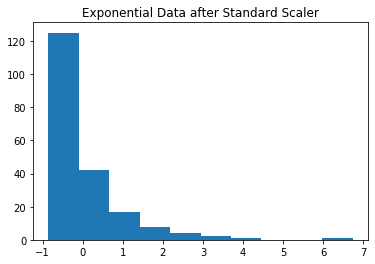

In [40]:
## After Standard Scaler

std_scaled_exponential = standard_scaler.fit_transform(exponential_data.reshape(-1,1))

plt.hist(std_scaled_exponential)
plt.title('Exponential Data after Standard Scaler')

plt.show()

In [41]:
# let's mean and std seperately

std_exponential_mean = round(std_scaled_exponential.mean(), 4)

std_exponential_std = round(std_scaled_exponential.std(), 4)

print(f'Mean of exponential_data after scaling is {std_exponential_mean:.4f}')
print(f'Std of exponential_data after scaling is {std_exponential_std:.4f}')

Mean of exponential_data after scaling is -0.0000
Std of exponential_data after scaling is 1.0000


## MinMax Scaler


[Sklearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler)

__Your Turn__

- Apply minmax scaler to the data and plot it.

- Check the mean and std of individual columns


In [68]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range = (0,1))

In [71]:
X = np.random.multivariate_normal(mean=(1, 1),
                                  cov=[[1, 0.7], [0.7, 1]],
                                  size=200)

In [72]:
X_minmax = mms.fit_transform(X)
X_minmax[:10]

array([[0.45143267, 0.5058448 ],
       [0.41970783, 0.38658677],
       [0.37165721, 0.34739078],
       [0.27625525, 0.39787543],
       [0.42836859, 0.42940437],
       [0.42387606, 0.53015903],
       [0.51752264, 0.65550811],
       [0.67278741, 0.31696403],
       [0.56878164, 0.34187049],
       [0.41284458, 0.22291178]])

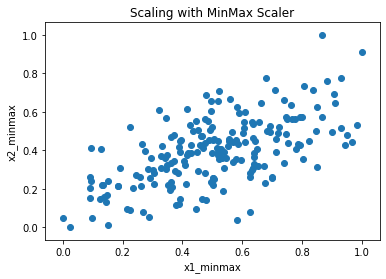

In [73]:
plt.scatter(X_minmax[:, 0], X_minmax[:, 1])

plt.title('Scaling with MinMax Scaler')

plt.xlabel('x1_minmax')
plt.ylabel('x2_minmax')

plt.show()

In [74]:
X_minmax.mean(axis=0)

array([0.50900038, 0.39635866])

In [75]:
X_minmax.std(axis=0)

array([0.2187579 , 0.17465006])

## Bonus: Normalizer

[Sklearn Documentation](https://scikit-learn.org/stable/modules/preprocessing.html#normalization)

In [53]:
from sklearn.preprocessing import Normalizer

In [54]:
normalizer = Normalizer()

X_normalized = normalizer.fit_transform(X.T).T

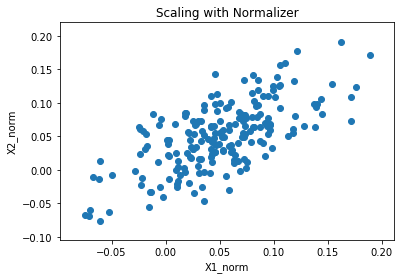

In [55]:
plt.scatter(X_normalized[:,0], X_normalized[:,1])

plt.title('Scaling with Normalizer')

plt.xlabel('X1_norm')
plt.ylabel('X2_norm')

plt.show()

In [56]:
X_normalized[:,0].mean()

0.050151402891938444

In [57]:
X_normalized[:,0].std()

0.04984813725677688